In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.shape

(5110, 12)

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
1) id: 고유 식별자 => drop 
2) gender: "남성", "여성" => dummy화
3) age : 환자 연령 => 그대로 사용
4) hypertension : 고혈압이 없으면 0, 고혈압이 있으면 1 => 그대로 사용
5) heart_disease: 심장질환이 없는 경우 0, 심장질환이 있는 경우 1 => 그대로 사용
6) ever_married: "아니오" 또는 "예"=> dummy 화
7) work_type: "children", "Govt_jov", "Never_work", "Private" 또는 "Self-employed(자영업자)"=> dummy화
8) 거주유형 : "농촌" 또는 "도시" => dummy화
9) avg_glucose_level: 혈중 포도당 평균 수준 => 그대로 사용 or normalize
10) bmi : 체질량지수 => NA 존재, 어떻게 처리할지 고민해야 함
11) smoking_status: "과거에 흡연", "비흡연", "흡연" 또는 "정보없음"
12) stroke: 뇌졸중일 경우 1, 뇌졸중일 경우 0

In [38]:
100*data.stroke.sum()/len(data) # imbalanced data set

4.87279843444227

# 1. data 시각화

### 1) 연속형(Numeric) 변수

In [28]:
#print(sns.__version__) # pip install seaborn==0.11.0  

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

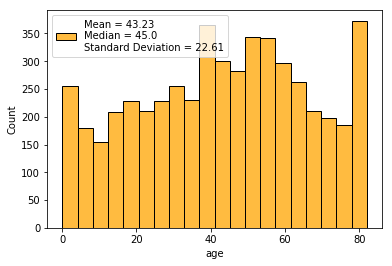

In [11]:
label_age='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%data["age"].mean(),data["age"].median(), "%.2f"%data["age"].std())
sns.histplot(x=data["age"],color="orange", label=label_age).legend(loc='best',fontsize=10)

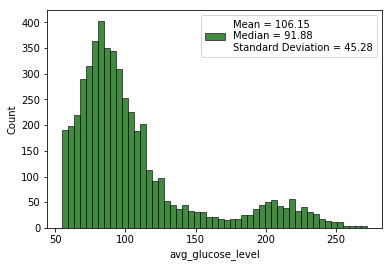

In [13]:
label_avg='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%data["avg_glucose_level"].mean(),"%.2f"%data["avg_glucose_level"].median(), "%.2f"%data["avg_glucose_level"].std())
sns.histplot(x=data["avg_glucose_level"],color="darkgreen", label=label_avg).legend(loc='best',fontsize=10)

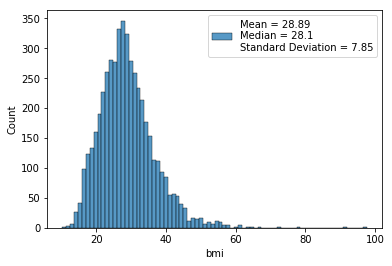

In [8]:
label_bmi='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%data["bmi"].mean(),data["bmi"].median(), "%.2f"%data["bmi"].std())
sns.histplot(x=data["bmi"],label=label_bmi).legend(loc='best',fontsize=10)

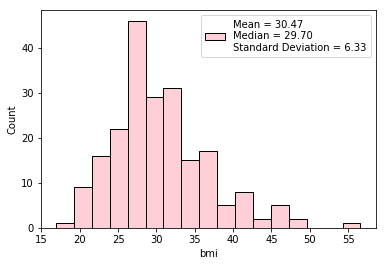

In [27]:
label_bmi='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%strok["bmi"].mean(),"%.2f"%strok["bmi"].median(), "%.2f"%strok["bmi"].std())
sns.histplot(x=strok["bmi"],color='pink', label=label_bmi).legend(loc='best',fontsize=10)

### 2) 범주형 변수

- gender 시각화

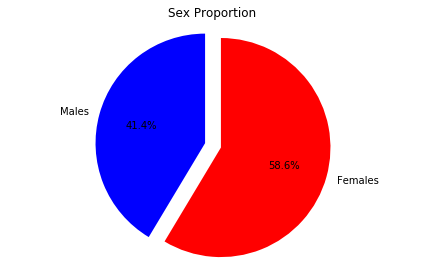

In [28]:
# gender 시각화
# sum the instances of males and females
males = (data['gender'] == 'Male').sum()
females = (data['gender'] == 'Female').sum()
proportions = [males, females]
plt.pie(
    proportions,
    labels = ['Males', 'Females'],
    shadow = False,
    colors = ['blue','red'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Sex Proportion")
plt.tight_layout()
plt.show()

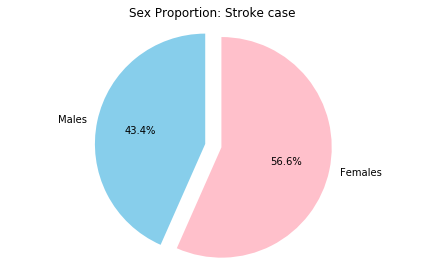

In [36]:
males = (strok['gender'] == 'Male').sum()
females = (strok['gender'] == 'Female').sum()
proportions = [males, females]
plt.pie(
    proportions,
    labels = ['Males', 'Females'],
    shadow = False,
    colors = ['skyblue','pink'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Sex Proportion: Stroke case")
plt.tight_layout()
plt.show()

- hypertension(고혈압)

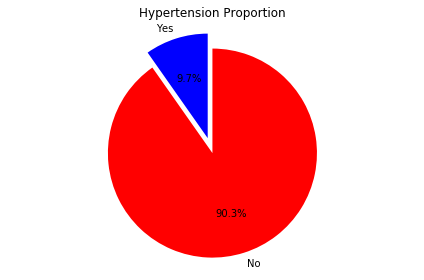

In [31]:
yes = (data['hypertension'] == 1).sum()
no = (data['hypertension'] == 0).sum()
proportions = [yes, no]
plt.pie(
    proportions,
    labels = ['Yes', 'No'],
    shadow = False,
    colors = ['blue','red'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Hypertension Proportion")
plt.tight_layout()
plt.show()

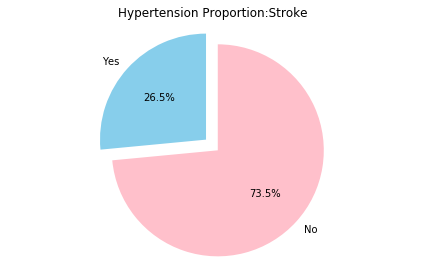

In [34]:
yes = (strok['hypertension'] == 1).sum()
no = (strok['hypertension'] == 0).sum()
proportions = [yes, no]
plt.pie(
    proportions,
    labels = ['Yes', 'No'],
    shadow = False,
    colors = ['skyblue','pink'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Hypertension Proportion:Stroke")
plt.tight_layout()
plt.show()

- heart disease(심장병)

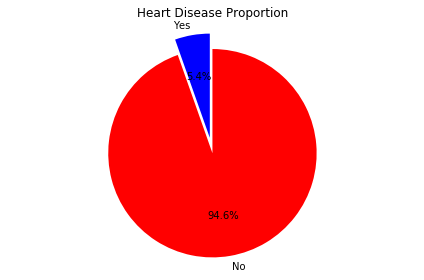

In [35]:
yes = (data['heart_disease'] == 1).sum()
no = (data['heart_disease'] == 0).sum()
proportions = [yes, no]
plt.pie(
    proportions,
    labels = ['Yes', 'No'],
    shadow = False,
    colors = ['blue','red'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Heart Disease Proportion")
plt.tight_layout()
plt.show()

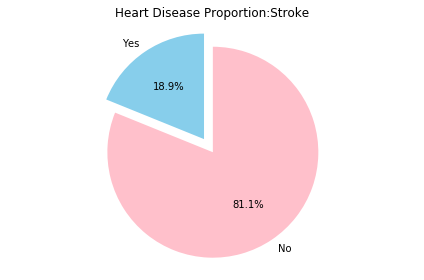

In [36]:
yes = (strok['heart_disease'] == 1).sum()
no = (strok['heart_disease'] == 0).sum()
proportions = [yes, no]
plt.pie(
    proportions,
    labels = ['Yes', 'No'],
    shadow = False,
    colors = ['skyblue','pink'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Heart Disease Proportion:Stroke")
plt.tight_layout()
plt.show()

- ever_married(결혼여부)

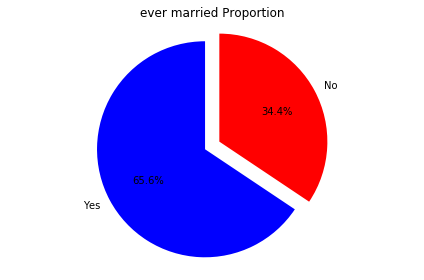

In [38]:
yes = (data['ever_married'] == 'Yes').sum()
no = (data['ever_married'] == "No").sum()
proportions = [yes, no]
plt.pie(
    proportions,
    labels = ['Yes', 'No'],
    shadow = False,
    colors = ['blue','red'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("ever married Proportion")
plt.tight_layout()
plt.show()

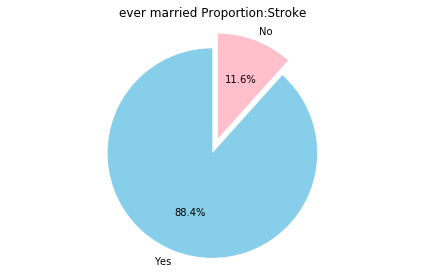

In [40]:
yes = (strok['ever_married'] == 'Yes').sum()
no = (strok['ever_married'] == "No").sum()
proportions = [yes, no]
plt.pie(
    proportions,
    labels = ['Yes', 'No'],
    shadow = False,
    colors = ['skyblue','pink'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("ever married Proportion:Stroke")
plt.tight_layout()
plt.show()

- work type

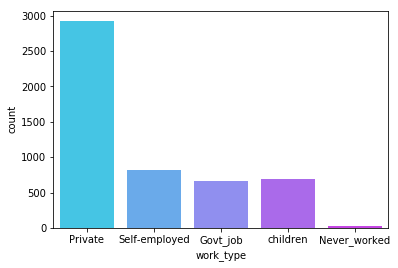

In [41]:
sns.countplot(x=data["work_type"],palette="cool")

- Residence_type

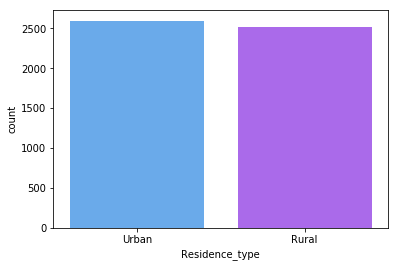

In [42]:
sns.countplot(x=data["Residence_type"],palette="cool")

- Smoking_status

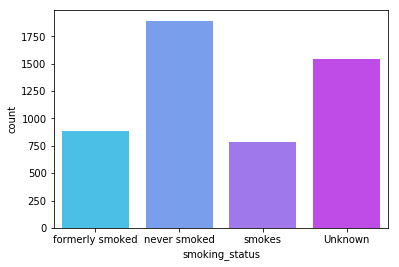

In [43]:
sns.countplot(x=data["smoking_status"],palette="cool")

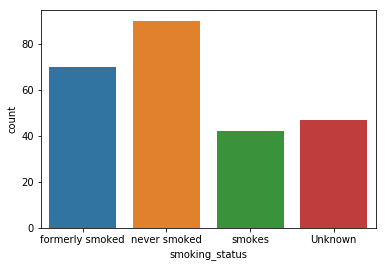

In [45]:
sns.countplot(x=strok["smoking_status"])

- Y(뇌졸중) 시각화

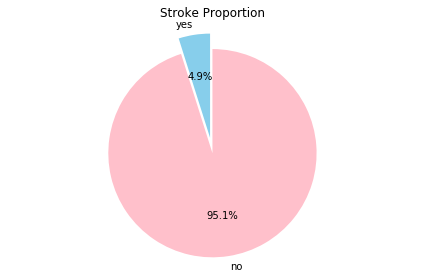

In [48]:
yes = (data['stroke'] == 1).sum()
no = (data['stroke'] == 0).sum()
proportions = [yes, no]
plt.pie(
    proportions,
    labels = ['yes', 'no'],
    shadow = False,
    colors = ['skyblue','pink'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Stroke Proportion")
plt.tight_layout()
plt.show()

### bmi NA imputation

In [13]:
#data['bmi'] = data['bmi'].fillna(data['bmi'].median())

In [40]:
#print(data.isnull().sum())

### 변수 1차 전처리

- 지울 변수: id(자체로 의미 x)
- 그대로 사용: age, hypertension, heart_disease, avg_glucose_level,bmi 그리고 stroke(타겟변수).
- Dummy화가 필요한 변수: gender, ever_married,work_type, residence_type, smoking_status 

In [ ]:
data= data.drop(['id'], axis=1)
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x == "Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)
data["gender"] = data["gender"].apply(lambda x: 1 if x == "Male" else 0)
data = pd.get_dummies(data=data, columns=['smoking_status', 'work_type'], drop_first=True) # 다중 공선성 문제

In [17]:
data_1= data.dropna()

In [9]:
data_1.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0,0,1,0,0


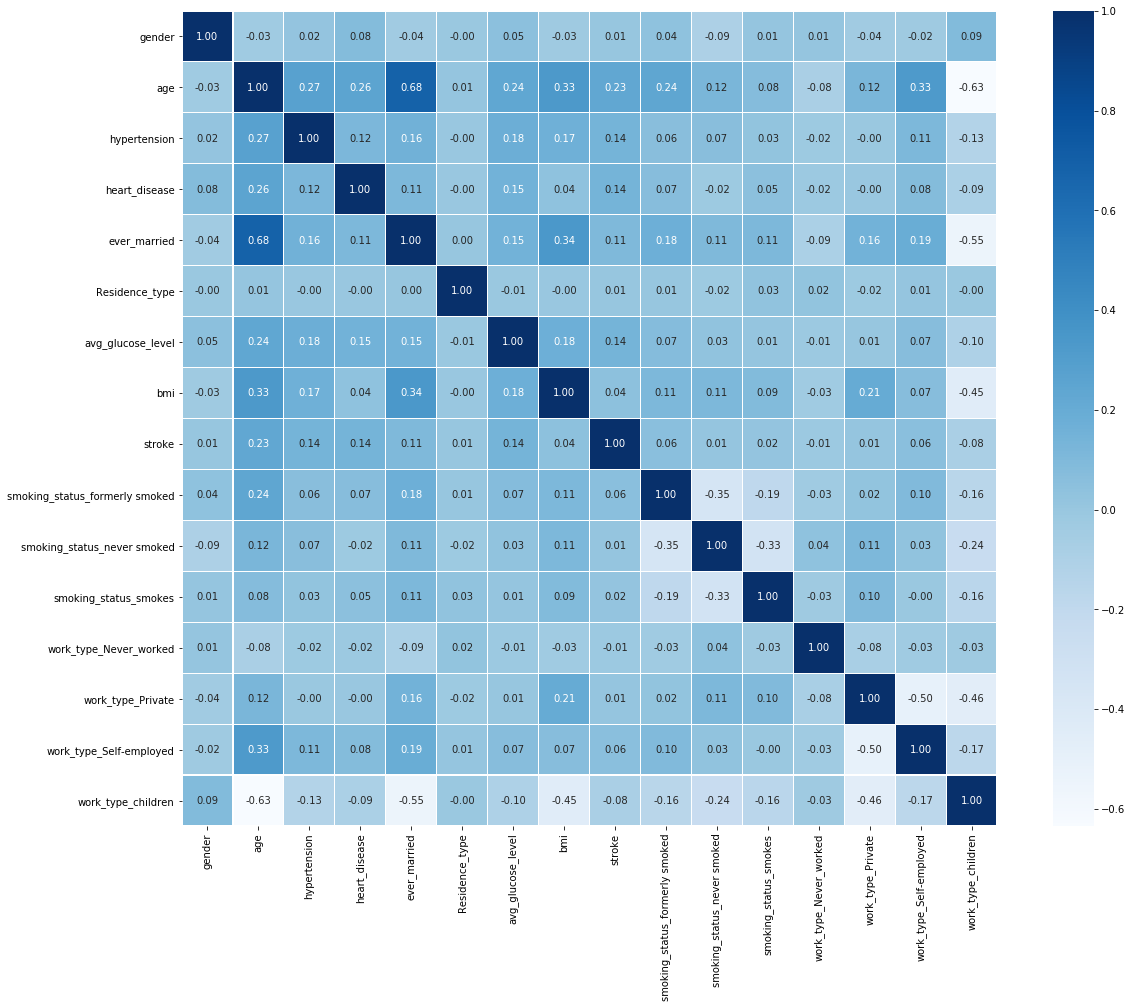

In [68]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_1.corr(), cbar = True, annot = True, fmt = '.2f', square = True, cmap = 'Blues', linewidths=.5)